# 골프장명을 이용한 크롤링

## use lib

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import os
import re


from bs4 import BeautifulSoup
from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
import time
from time import sleep

from urllib.parse import quote
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
import time
import pyperclip
import urllib.request
import requests
import urllib.parse 
from urllib import parse
import ssl

context = ssl._create_unverified_context()


In [74]:
from datetime import datetime, timedelta
today = datetime.now()          # datetime.today()
today

datetime.datetime(2022, 3, 21, 10, 25, 3, 658368)

## use method

In [72]:
def convert_date(s):
    if len(s) == 11:
        return s[:-1]

    today = datetime.now()
    if '어제' in s:
        date = today - timedelta(1)
    elif '일' in s:
        date = today - timedelta(int(s[:-3]))
    elif '시간' in s:
        date = today - timedelta(hours=int(s[:-4]))
    elif '분' in s:
        date = today - timedelta(minutes=int(s[:-3]))

    return f'{date.year}.{date.month:02d}.{date.day:02d}'

## use webdriver

In [2]:
pwd

'd:\\WorkSpace\\Next_Ez_jejudo'

In [ ]:
# driver = webdriver.Chrome(ChromeDriverManager().install()) ## 리눅스

In [3]:
driver = webdriver.Chrome('D:\WorkSpace\Jeju_Electric_Vehicle_analysis\chromedriver.exe')  # 윈도우 ## open driver for window version
time.sleep(1)

C:\Users\alsdn\AppData\Local\Temp/ipykernel_1596/1437496389.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:\WorkSpace\Jeju_Electric_Vehicle_analysis\chromedriver.exe')  # 윈도우 ## open driver for window version


In [ ]:
driver.quit() # close the driver

## read ID,PASSWORD

In [4]:
with open('D:\\WorkSpace\\mykey\\Naver_pw.txt') as file: # 윈도우
    PASSWORD = file.read()
with open('D:\\WorkSpace\\mykey\\Naver_ID.txt') as file: # 윈도우 
    ID = file.read()

In [35]:
## 리눅스
with open('/home/miwoos/WorkSpace/mykey/Naver_pw.txt') as file: 
    PASSWORD = file.read()
with open('/home/miwoos/WorkSpace/mykey/Naver_ID.txt') as file:
    ID = file.read()

### test driver

In [5]:
search = '제주전기차'
url = 'https://search.naver.com/search.naver?where=post&sm=tab_jum&query=' 
newurl = url+parse.quote(search)

In [6]:
html = urllib.request.urlopen(newurl).read()

In [ ]:
html

In [10]:
soup = BeautifulSoup(html,'html.parser')

In [ ]:
soup

In [12]:
title = soup.find_all(class_='api_txt_lines dsc_txt')

In [13]:
title[1].text

'아이오닉 제주 전기차 렌트를 생각보다 빠르게 진행할 수 있었다. 내비게이션... 완전자차로 제주도 차 렌트한 전기차 아이오닉은 트렁크도 넓어 여행가방 2~3개를... '

## login the website naver

In [28]:
PASSWORD

'alsdnji'

In [37]:
uid = ID
upw = PASSWORD

'931811ji!'

In [40]:
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com' 
# uid = ID
# upw = PASSWORD
#네이버 로그인 페이지로 이동 
driver.get(url) 
time.sleep(2) #로딩 대기 

#아이디 입력폼 
tag_id = driver.find_element_by_name('id') 
#패스워드 입력폼 
tag_pw = driver.find_element_by_name('pw')

# id 입력 
# 입력폼 클릭 -> paperclip에 선언한 uid 내용 복사 -> 붙여넣기 
tag_id.click() 
pyperclip.copy(uid) 
tag_id.send_keys(Keys.CONTROL, 'v') 
time.sleep(1) 

# pw 입력 # 입력폼 클릭 -> paperclip에 선언한 upw 내용 복사 -> 붙여넣기
tag_pw.click() 
pyperclip.copy(upw) 
tag_pw.send_keys(Keys.CONTROL, 'v')
time.sleep(1) 

#로그인 버튼 클릭 
login_btn = driver.find_element_by_id('log.login') 
login_btn.click() 
time.sleep(2)


/tmp/ipykernel_269569/3318163898.py:9: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  tag_id = driver.find_element_by_name('id')
/tmp/ipykernel_269569/3318163898.py:11: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  tag_pw = driver.find_element_by_name('pw')
QXcbClipboard::setMimeData: Cannot set X11 selection owner
QXcbClipboard::setMimeData: Cannot set X11 selection owner
/tmp/ipykernel_269569/3318163898.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login_btn = driver.find_element_by_id('log.login')


## Use and read Data

In [2]:
# 경로변경
os.chdir('G:\내 드라이브\Data')
!pwd

In [8]:
df= pd.read_excel("D:\GoogleDrive\Data\Data\넥스트이지_골프장\제주골프장_정보(강지희).xlsx")

In [9]:
df.골프장명.values

array(['그린필드CC', '나인브릿지CC', '더시에나(구.제주)C.C', '더클래식CC', '라온GC', '라헨느CC',
       '레이크힐스CC', '롯데스카이힐제주CC', '부영CC', '블랙스톤CC', '사이프러스CC', '샤인빌CC',
       '세인트포CC', '스프링데일CC', '아덴힐GC', '에버리스CC', '에코랜드GC', '엘리시안CC', '오라CC',
       '우리들CC', '중문GC', '캐슬렉스제주GC', '크라운CC', '타미우스CC', '테디밸리CC',
       '플라자CC제주', '핀크스GC', '한라산CC', '해비치CC'], dtype=object)

### Coding th algo

In [10]:
for i,item in enumerate(df.골프장명):
    
    print( str(i)+' '+item)

0 그린필드CC
1 나인브릿지CC
2 더시에나(구.제주)C.C
3 더클래식CC
4 라온GC
5 라헨느CC
6 레이크힐스CC
7 롯데스카이힐제주CC
8 부영CC
9 블랙스톤CC
10 사이프러스CC
11 샤인빌CC
12 세인트포CC
13 스프링데일CC
14 아덴힐GC
15 에버리스CC
16 에코랜드GC
17 엘리시안CC
18 오라CC
19 우리들CC
20 중문GC
21 캐슬렉스제주GC
22 크라운CC
23 타미우스CC
24 테디밸리CC
25 플라자CC제주
26 핀크스GC
27 한라산CC
28 해비치CC


In [36]:
golf_course_name=df.골프장명.values

In [41]:
golf_course_name=list(golf_course_name)
golf_course_name.append('제주CC')

In [80]:
golf_course_name

['그린필드CC',
 '나인브릿지CC',
 '더시에나(구.제주)C.C',
 '더클래식CC',
 '라온GC',
 '라헨느CC',
 '레이크힐스CC',
 '롯데스카이힐제주CC',
 '부영CC',
 '블랙스톤CC',
 '사이프러스CC',
 '샤인빌CC',
 '세인트포CC',
 '스프링데일CC',
 '아덴힐GC',
 '에버리스CC',
 '에코랜드GC',
 '엘리시안CC',
 '오라CC',
 '우리들CC',
 '중문GC',
 '캐슬렉스제주GC',
 '크라운CC',
 '타미우스CC',
 '테디밸리CC',
 '플라자CC제주',
 '핀크스GC',
 '한라산CC',
 '해비치CC',
 '제주CC']

In [81]:
golf_course_name
url = []
lines = []
for i,name in enumerate(golf_course_name):
    try:   
        url.append(f'https://search.naver.com/search.naver?where=view&sm=tab_jum&query={quote(golf_course_name[i])}')
        driver = webdriver.Chrome('D:\WorkSpace\Jeju_Electric_Vehicle_analysis\chromedriver.exe')
        driver.get(url[i])
        time.sleep(2)
        body = driver.find_element_by_tag_name('body')
        for _ in range(50):
            body.send_keys(Keys.PAGE_DOWN)
            time.sleep(1)
            soup = BeautifulSoup(driver.page_source)
            lis = soup.select('li.bx._svp_item')
            len(lis)
        for li in lis:
            try:
                title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip()
                date = li.select_one('.sub_time.sub_txt').get_text().strip()
                desc = li.select_one('.api_txt_lines.dsc_txt').get_text().strip()
                href = li.select_one('a.api_txt_lines.total_tit._cross_trigger')['href']
                name = golf_course_name[i]
                lines.append([title,convert_date(date),desc,href,name])
            except:
                 if li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text().strip() == None:
                        title = '내용이없습니다.'
                 if li.select_one('.api_txt_lines.dsc_txt').get_text()==None:
                        desc == '내용이없습니다.'
    except:
        pass

C:\Users\alsdn\AppData\Local\Temp/ipykernel_1596/2278853513.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:\WorkSpace\Jeju_Electric_Vehicle_analysis\chromedriver.exe')
C:\Users\alsdn\AppData\Local\Temp/ipykernel_1596/2278853513.py:10: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  body = driver.find_element_by_tag_name('body')


In [75]:
driver.quit()

C:\Users\alsdn\AppData\Local\Temp/ipykernel_1596/1812352079.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:\WorkSpace\Jeju_Electric_Vehicle_analysis\chromedriver.exe')


In [82]:
df = pd.DataFrame(lines, columns=['제목','날짜','내용','href','골프장명'])
df[['제목','날짜','내용','href','골프장명']].head()

,제목,날짜,내용,href,골프장명
0,제주도 골프장 제주 그린필드CC 가성비 부킹 예약 라운드 괜찮음!,2021.08.19,비오는날 가봤던 제주도 골프장 제주 그린필드CC 부킹 예약 라운드 후기 입니다. 제...,https://blog.naver.com/ufohaw0359/222476351752,그린필드CC
1,감탄했던 제주 그린필드cc 맛집,2022.02.07,친구들과 떠난 제주 여행에서 들린 제주 그린필드cc 맛집 바다풍경횟집 소개해드릴께요...,https://blog.naver.com/ogiya8282/222638917594,그린필드CC
2,"제주도 골프장 그린필드cc 2인 라운딩 후기, 제주 골프 여행 예약은 골프부킹황제",2021.09.22,있는 그린필드 컨트리클럽에서 와이프와 2인 라운딩을 즐길 수 있었습니다. 가성비 좋...,https://blog.naver.com/double_bogey/222513188289,그린필드CC
3,제주 그린필드cc 2인 조인 예약 가격대비 실화?,2022.03.10,제가 골프장 예약부터 이동 차량까지 확실하게 준비해 드리겠습니다 ^_^ #제주그린필...,https://blog.naver.com/tourjejudo064/222668966033,그린필드CC
4,그린필드CC 2인라운딩 제주도골프장,2021.09.14,그린필드CC 2인라운딩 제주도골프장 그린필드CC 위치안내 : 제주공항에서 약30분 ...,https://blog.naver.com/ieeo/222504464418,그린필드CC


<AxesSubplot:>

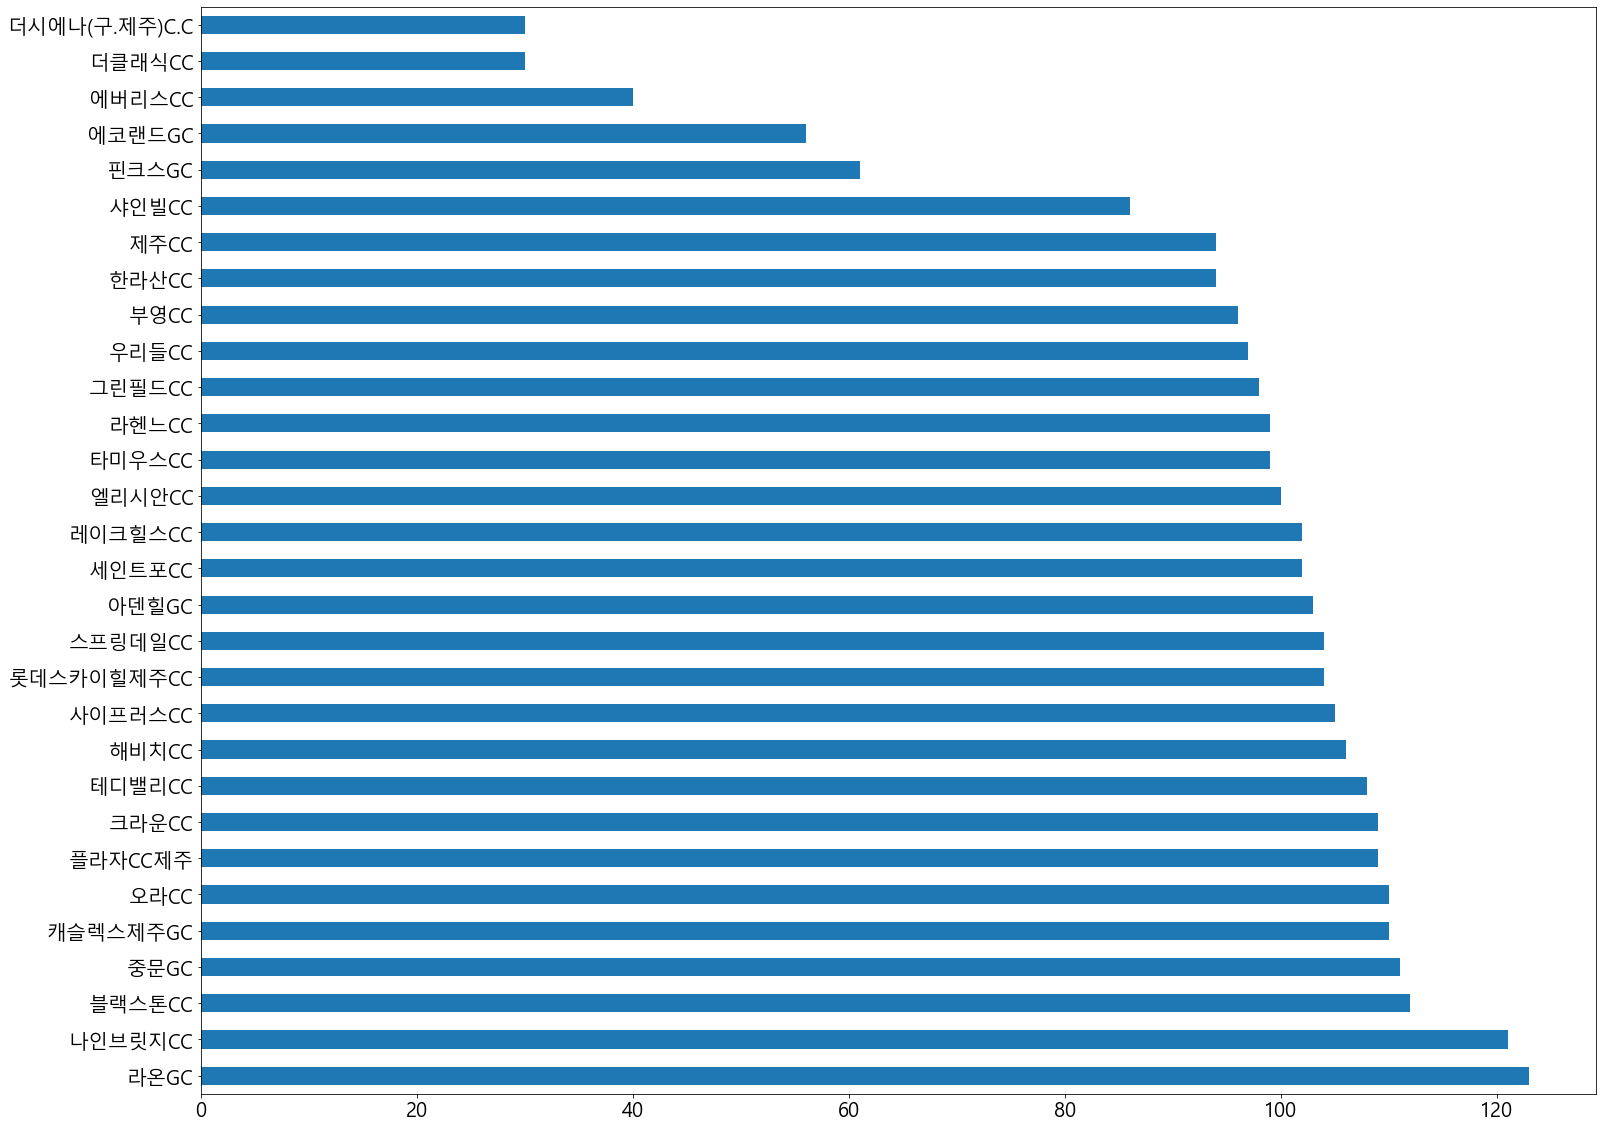

In [96]:
plt.figure(figsize=(25,20))
df.골프장명.value_counts().plot.barh(fontsize=20)

In [93]:
df.날짜.value_counts()

2022.03.11    38
2022.03.10    34
2022.03.04    32
2022.03.08    30
2022.03.17    30
              ..
2018.06.07     1
2018.05.16     1
2018.11.26     1
2019.07.14     1
2021.07.26     1
Name: 날짜, Length: 774, dtype: int64

In [97]:
df.to_csv('골프장네이버크롤링.csv',index=False)